# D212: Data Mining, Task 1
Western Governors University
<br>Bailey Psuik 
<br>February 2024

### Part I: Research Question

**A1. Proposal of question**
<br>For this paper, data from a popular telecommunications company was analyzed. The company has collected data on its customers including demographic information, the services they receive, and customer account information in an effort to analyze their churn rate. Churn is defined as the percentage of customers who have discontinued service with the provider. Industry-wide, annual churn rates can be as high as 25%. The company knows that it is more cost-effective to retain existing customers than to acquire new ones, and therefore seeks to identify trends in customer data and uncover key metrics to help them predict their anticipated churn rate in hopes of mitigating it. Based on prior research, the company knows that the longer a customer stays with them (the longer their tenure), the less likely that customer is to churn (Psuik, 2024).

This report will make use of **k-means clustering** to answer the following question: **Can meaningful customer segments be established based on customers' tenure length, monthly charges, and bandwidth usage?**

**A2. Defined goal**
<br>The goal of this analysis is to build segments of customers with similarities in their length of tenure, their monthly charges, and their bandwidth usage. The purpose of these segments is to improve efforts of the account management team and the marketing team. With customers split into meaningful segments, internal teams can better serve these customers as they learn common characteristics among them.

### Part II: Technique Justification

**B1. Explanation of clustering technique**
<br>K-means clustering is an unsupervised learning technique that places similar data points together in groups, or clusters (Wilson, n.d.). Data points are assigned to clusters based on the nearest centroid, which represents the mean of the cluster. The aim of this method is for the data points in each cluster to be as similar to each other as possible. Put differently, data points in different clusters should be as dissimilar as possible (Sharma, 2023).

The expected outcome after performing k-means clustering is a data set separated into the optimal amount of clusters as determined by various metrics such as a model's silhouette score or inertia. These metrics and their interpretation will be discussed further in section E1 when evaluating the model created in this report.

**B2. Summary of the technique assumption**
<br>A key assumption of k-means clustering is that all variables included in the model are continuous. Clusters are evaluated based on the Euclidean distance between them. The shortest distance between two clusters is calculated in this way. Distances refer to numerical differences on measured continuous variables. The definition of Euclidean distance thus requires that the variables used to determine clusters be continous (Columbia, n.d.). 

**B3. Packages list** 

* **Pandas**: used for data importing/exporting and dataframe creation
* **Numpy**: used for working with arrays and matrices
* **Matplotlib** and **Seaborn**: both used to create visualizations
* Various functions from **scikit-learn (sklearn)**: 
    * **sklearn.preprocessing**
        * **StandardScaler**: used for normalizing the data set by calculating data points' z-score
    * **sklearn.cluster**
        * **KMeans**: used to create the k-means model
    * **sklearn.metrics**
        * **silhouette_score**: used for calculating the silhouette score of the k-means model

### Part III: Data Preparation

**C1. Data preprocessing**
<br>Apart from cleaning the data, a data preprocessing step that is crucial to performing k-means clustering is normalizing the data. Normalization is performed using scikit-learn's StandardScaler to compute the z-score of each data point. With data on the same scale, it can then be utilized in model building. 

**C2. Data set variables**
<br>To perform the analysis, the following variables from the churn data set will be used:
* Bandwidth_GB_Year
* MonthlyCharge
* Tenure

As k-means clustering requires each variable included to be continuous, each of the selected variables from the churn data set are continuous.

**C3. Steps for analysis**
<br>To simplify the cleaning and preprocessing steps, a reduced dataframe will first be created with only the variables relevant to this analysis: Bandwidth_GB_Year, MonthlyCharge, and Tenure. 

First, all duplicate and missing values will be identified and treated, if necessary. K-means clustering is especially sensitive to outliers, so those will be addressed next so as not to skew results (Sharma, 2023). 

After all cleaning steps are completed, the final preprocessing step of normalizing the data will be completed using scikit-learn's StandardScaler. 

The code executed to complete each of these steps is included below.

In [36]:
# Data cleaning steps: 

# import initial packages + churn dataset 
import pandas as pd
import numpy as np

churn_data = pd.read_csv("C:/Users/psuik/Desktop/WGU/D212/churn_clean.csv")

# explore initial dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [37]:
# Create a reduced dataframe, df, with relevant variables to be used in the k-means model
df = churn_data[['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure']].copy()
df.head()

,Bandwidth_GB_Year,MonthlyCharge,Tenure
0,904.536110,172.455519,6.795513
1,800.982766,242.632554,1.156681
2,2054.706961,159.947583,15.754144
3,2164.579412,119.956840,17.087227
4,271.493436,149.948316,1.670972


In [38]:
# With the reduced dataframe, df, created, identify duplicates in df
# Return duplicate values as True, non-duplicates as False
print(df.duplicated())

# Get total counts of duplicate values
print(df.duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
False    10000
Name: count, dtype: int64


In [41]:
# True = duplicate, False = non-duplicate
# 10,000 False values ==> No duplicates exist in df


# Identify missing values in df
df.isnull().sum()

Bandwidth_GB_Year    0
MonthlyCharge        0
Tenure               0
dtype: int64

<Axes: xlabel='Tenure'>

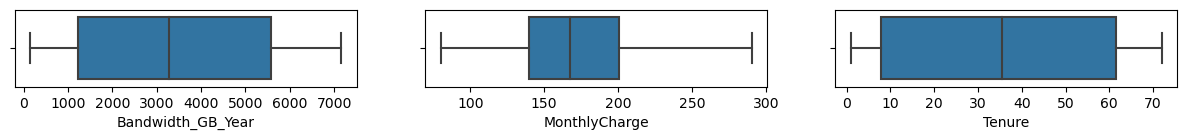

In [40]:
# No missing values to treat in any column in df


# Identify and treat outliers

# Visually show outliers for each quantitative variable on respective box plots
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 1))

plt.subplot(1, 3, 1)
sns.boxplot(x='Bandwidth_GB_Year', data = df)

plt.subplot(1, 3, 2)
sns.boxplot(x='MonthlyCharge', data = df)

plt.subplot(1, 3, 3)
sns.boxplot(x='Tenure', data = df)

In [42]:
# No outliers exist within the dataframe df, so no treatment is needed


# Data is now cleaned. Move on to data normalization

#(Kamara, n.d.)
# Import StandardScaler from scikit-learn, which normalizes the data by computing z-scores for each data point
from sklearn.preprocessing import StandardScaler

# Instantiate the standard scaler object
scaler = StandardScaler()

# Fit the scaler and transform the data points into z-scores. Store the normalized dataframe as scaled_df
scaled_df = scaler.fit_transform(df[['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure']])

# Create a new dataframe, scaled_df, from the scaled data
scaled_df = pd.DataFrame(scaled_df, columns = ['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure'])
scaled_df.head()

,Bandwidth_GB_Year,MonthlyCharge,Tenure
0,-1.138487,-0.003943,-1.048746
1,-1.185876,1.630326,-1.262001
2,-0.612138,-0.295225,-0.709940
3,-0.561857,-1.226521,-0.659524
4,-1.428184,-0.528086,-1.242551


**C4. Cleaned data set**
<br>The cleaned data set is downloadable via the code below.

In [43]:
df.to_csv("C:/Users/psuik/Desktop/WGU/D212/churn_clean_D212_task1.csv")

The cleaned *and* normalized data set is downloadable via the code below.

In [44]:
scaled_df.to_csv("C:/Users/psuik/Desktop/WGU/D212/scaled_churn_clean_D212_task1.csv")

### Part IV: Analysis

**D1. Output and intermediate calculations**
<br>To determine the optimal number of clusters necessary for the k-means model, the following steps will be performed:
1. Perform an initial k-means clustering with k clusters. In this case, k will be 3.
2. Evaluate the initial model based on its silhouette score and inertia.
3. Construct an elbow plot to determine the optimal number of clusters. The "elbow" in the elbow plot is the point at which the improvement in the inertia value begins to level off, thus indicating little value in separating the data points into an additional cluster.
4. Re-run the k-means clustering model with an updated k value as determined by the elbow plot.

The full code used to execute this process is included in section D2 below.

**D2. Code execution**
<br> The code used to build the k-means model and evaluate it, along with visualizations to aid in the analysis, is below.

<Axes: xlabel='Bandwidth_GB_Year', ylabel='MonthlyCharge'>

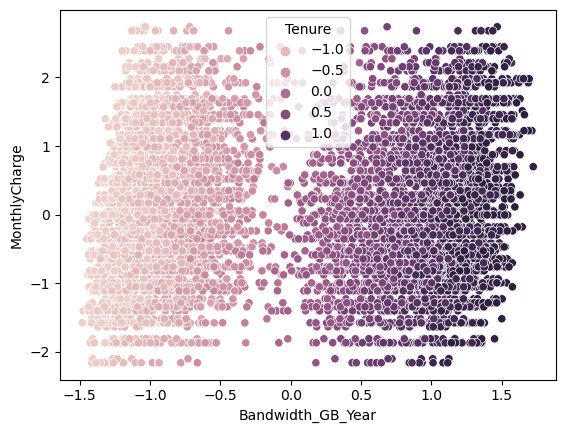

In [45]:
# Before building the model, the scaled data frame is represented visually on the scatterplot below.

sns.scatterplot(data=scaled_df, x='Bandwidth_GB_Year', y='MonthlyCharge', hue='Tenure')

In [64]:
# Creating the k-means model:
# (Kamara, n.d.)

# Import KMeans from scikit learn 
from sklearn.cluster import KMeans

# Instantiate the KMeans model, k_model, with 3 clusters
k_model = KMeans(n_clusters = 3, n_init='auto')

# Fit the scaled dataframe to the kmeans model
k_model.fit(scaled_df)

KMeans(n_clusters=3, n_init='auto')

<Axes: xlabel='Bandwidth_GB_Year', ylabel='MonthlyCharge'>

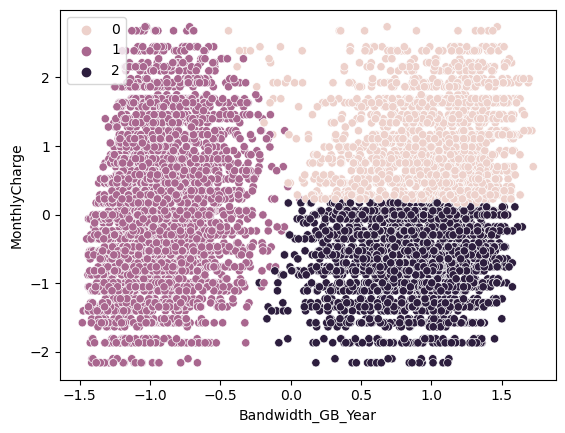

In [47]:
# Now that the scaled data frame is fit, labels for the KMeans model can be accessed via the labels_ attribute (Babitz, 2023)
# The three clusters created in this initial model are visualized below*: 
sns.scatterplot(data = scaled_df, x='Bandwidth_GB_Year', y='MonthlyCharge', hue = k_model.labels_)

# *Note: This visualization includes only two of the three variables used in this model-- Bandwidth_GB_Year and MonthlyCharge. 
    # This visualization is not comprehensive and simply serves as a visual aid for the initial clusters.

<Axes: ylabel='Tenure'>

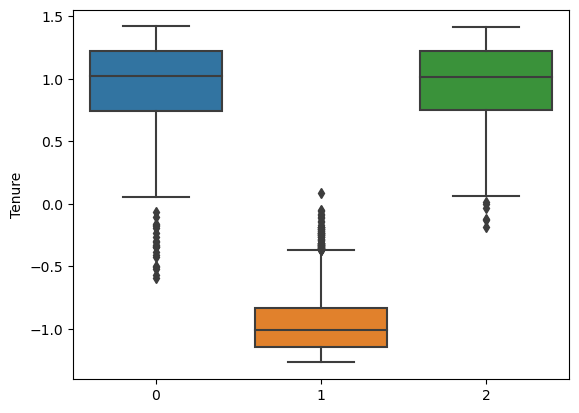

In [48]:
# As Tenure is not included in the scatterplot above, the data can also be visualized with a boxplot to show the spread in Tenure for each initial cluster:
sns.boxplot(x = k_model.labels_, y = scaled_df['Tenure'])

In [13]:
# Evaluation of initial KMeans model, k_model:
# Silhouette score* and inertia* are two metrics on which to evaluate the k-means model, these metrics will be calculated for the initial model for comparison
# *more information on these metrics in section E1 below

# Calculate silhouette score (Educative.io, n.d.)

# Import silhouette_score from scikit-learn
from sklearn.metrics import silhouette_score

# Calculate silhouette score of the initial model
initial_silhouette = silhouette_score(scaled_df, k_model.labels_, metric='euclidean')
initial_silhouette

0.5040404362890192

In [49]:
# Calcute inertia (Sharma, 2023)

initial_inertia = k_model.inertia_
initial_inertia

8244.414402941176

In [50]:
# Calculate the centroids of the initial model
# (Kamara, n.d.)

centroid = pd.DataFrame(k_model.cluster_centers_, columns=['Bandwidth_GB_Year', 'MonthlyCharge', 'Tenure'])
centroid

,Bandwidth_GB_Year,MonthlyCharge,Tenure
0,1.009987,1.029162,0.951899
1,-0.956354,-0.004359,-0.964182
2,0.903751,-0.674515,0.955100


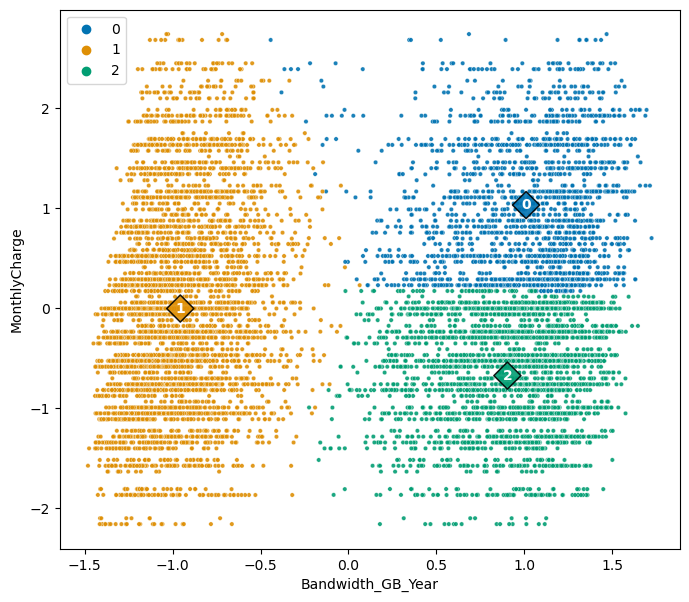

In [55]:
# Create a scatterplot to visually show where the centroids for k_model are located
# (Kamara, n.d.)

plt.figure(figsize=(8,7))

ax = sns.scatterplot(data=scaled_df, x='Bandwidth_GB_Year', y='MonthlyCharge', hue=k_model.labels_, 
                     palette='colorblind', alpha=0.9, s=10, legend=True)
ax = sns.scatterplot(data=centroid, x='Bandwidth_GB_Year', y='MonthlyCharge', hue=centroid.index, palette='colorblind',
                     alpha=0.9, s=190, marker='D', ec='black', legend=False)

for i in range(len(centroid)):
    plt.text(x = centroid.Bandwidth_GB_Year[i],
             y = centroid.MonthlyCharge[i],
             s = i,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             size = 10, weight = 'bold', color = 'white')

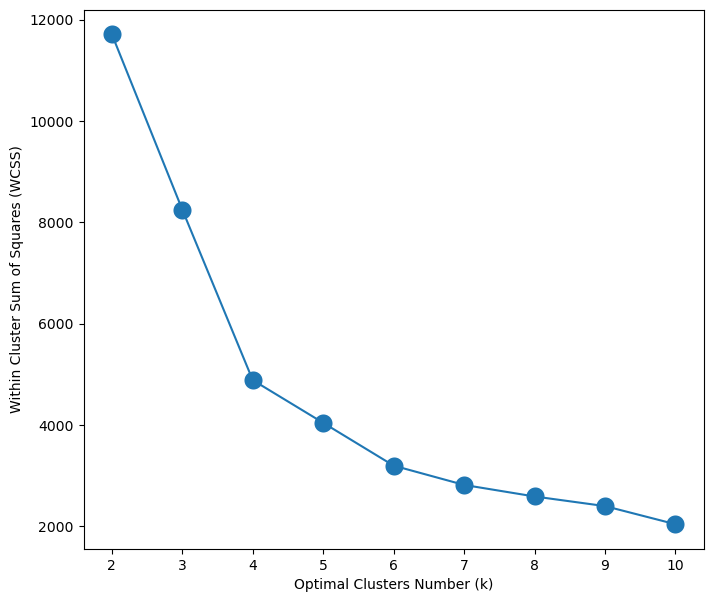

In [59]:
# Create an elbow plot to determine the optimal number of clusters
# Note: WCSS, or "Within Cluster Sum of Squares", is another term for inertia
# (Kamara, n.d.)
wcss = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(scaled_df)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(2,11))

plt.figure(figsize=(8,7))
ax = sns.lineplot(y=wcss_s, x=wcss_s.index)
ax = sns.scatterplot(y=wcss_s, x=wcss_s.index, s=200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)', ylabel='Within Cluster Sum of Squares (WCSS)')

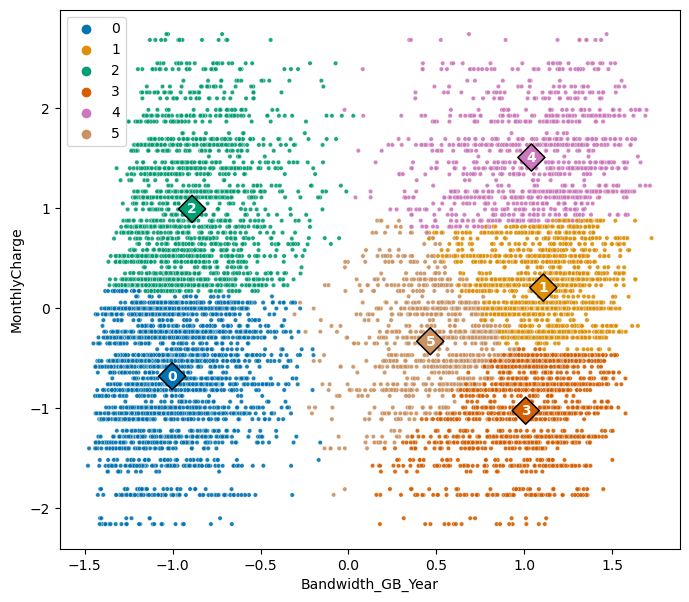

In [60]:
# The above elbow plot as an "elbow" at 6, which indicates that the optimal number of clusters (k) is 6, as this is the point at which improvements in inertia, or WCSS, begin to level out

# Create an updated KMeans model with 6 clusters, Fin_model 
# (Kamara, n.d.)
Fin_model = KMeans(n_clusters = 6, n_init='auto')
Fin_model.fit(scaled_df)

# Re-calculate centroid locations for Fin_model
centroid = pd.DataFrame(Fin_model.cluster_centers_, columns=['Bandwidth_GB_Year','MonthlyCharge', 'Tenure'])

# Create an updated scatterplot to visually show the updated clusters
plt.figure(figsize=(8,7))
ax = sns.scatterplot(data = scaled_df, x='Bandwidth_GB_Year', y='MonthlyCharge', hue=Fin_model.labels_,
                     palette = 'colorblind', alpha=0.9, s=10, legend=True)
ax = sns.scatterplot(data = centroid, x='Bandwidth_GB_Year', y='MonthlyCharge', hue=centroid.index, 
                     palette='colorblind', s=190, marker='D', ec='black', legend=False)

for i in range(len(centroid)):
    plt.text(x=centroid.Bandwidth_GB_Year[i],
             y=centroid.MonthlyCharge[i],
             s=i,
             horizontalalignment='center', verticalalignment='center', size=10, weight='bold', color='white')

In [61]:
# Evaluation of final KMeans model, Fin_model:
# (Kamara, n.d.)
fin_silhouette = silhouette_score(scaled_df, Fin_model.labels_, metric='euclidean')
fin_silhouette

0.4300264778095176

In [62]:
fin_inertia = Fin_model.inertia_
fin_inertia

3659.382306256571

<Axes: ylabel='Tenure'>

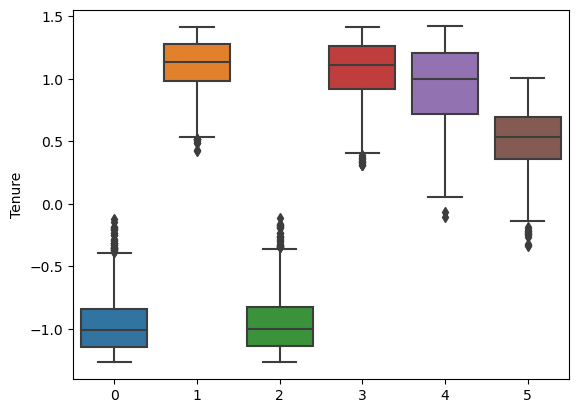

In [63]:
# Visually represent the spread of Tenure for each cluster again, this time for Fin_model
sns.boxplot(x = Fin_model.labels_, y = scaled_df['Tenure'])

### Part V: Data Summary and Implications

**E1. Quality of the clustering technique**
<br>The quality of the clusters created in the k-means model here is measured by two key metrics: Silhouette score and inertia. 

*Silhouette Score*: This metric measures how similar the data points in each individual cluster are to one another (Sharma, 2023). The scores range from -1 to 1. A higher silhouette score (i.e. closer to 1) is ideal as it indicates that the data points are very similar to one another, while a silhouette score of 0 indicates overlap in the clusters. A negative silhouette score indicates that the data is poorly clustered. 

In the k-means model here, the silhouette score for the 6-cluster model (Fin_model) is 0.43. This suggests that the model does a relatively okay job at separating the data points in such a way that the clusters are made up of similar data points. It should be noted, however, that the initial model with 3 clusters came out with a slightly higher silhouette score of 0.504. 

*Inertia*: This metric measures how far the points within a cluster are from one another (Sharma, 2023). More specifically, it calculates the sum of the distances of the points within a cluster from the cluster's centroid. This ties back to the assumption of k-means models mentioned in section B2, as euclidean distance is used for this calculation. 

This model's initial inertia value, for the 3-cluster model, was computed as 8244.142, while the 6-cluster model returned an inertia of 3659.382. With the inertia of the Fin_model less than half of its initial value, it can be said that the 6-cluster model (Fin_model) is much better than the initial model as the data points within each of the 6 clusters are closer together than the data points were when they were divided into just 3 clusters.

**E2. Results and implications**
<br>The research question posed in A1 asks **"Can meaningful customer segments be established based on customers' tenure length, monthly charges, and bandwidth usage?"**. The ultimate goal of this analysis was to be able to provide internal teams within the telecommunications company with useful customer segments so that they could tailor solutions to different customer groups. 

To answer the initial question and determine if the goal was met-- Yes, the customers can, in fact, be separated into clusters based on these characteristics, but a key word in this research question is 'meaningful'. The analysis performed here leads to an ambiguous answer on whether or not the model and its respective clusters are to be considered meaningful. The meaning, or usefulness, of these clusters is subjective in this case based on whether silhouette score or intertia is deemed a more heavily-weighted metric. The initial model provides a higher (i.e. better) silhouette score than the final model does. With that, the final model is not at all an improvement from the initial model. However, the inertia of the final model is significantly improved from the initial model, with the final model's inertia less than half of the initial model's inertia. With that, the final model is a drastic improvement from the initial model. To reiterate, based on the analysis of these metrics, the meaningfulness behind the model is subjective.

Ultimately, based on the subjectivity in results, the implication here is that further analysis is needed.

**E3. Limitation**
<br>A limitation of k-means models in general is that there may not be an exactly optimal number of clusters. This is demonstrated by the model created and altered in this report. The initial number of clusters, set manually, was 3. The model was then run and evaluated on its 3 clusters. The elbow plot indicated that 4 clusters was optimal for this analysis. When the k-means model was then run with 4 clusters instead of 3, the silhouette score indicated worse performance of the 4-cluster model, while the inertia of the 4-cluster model improved drastically. This provides somewhat of an ambiguous result, as the "optimal" number of clusters could likely be considered to be either 3 or 4, depending on which metric is weighed heavier by its interpreter. This is subjective. Thus, the limitation of this model is that the "optimal" number of clusters is inconclusive.

**E4. Course of action**
<br>Based on the results outlined in section E2 above, it cannot be recommended that the telecommunications company utilize this model in an effort to segment its customers into meaningful groups, as this analysis set out to do. The recommended course of action is that the company perform further analysis to create a k-means model that will separate customers into groups with a more clear separation in characteristics. To expand on that point, any further k-means model-building performed on this data should seek to construct a model with a silhouette score closer to 1, and an intertia value closer to 0. Looking at the metrics for the model(s) built for this analysis, there is certainly potential for improvement. 

It should be noted that KMeans models may be limited in their usefulness for the data the company has collected, however. As previously noted, k-means clustering requires each variable included to be a continuous numeric variable. With the available data that the company has on its customers, there are just seven variables out of the data set's 50 columns that meet this requirement. If no further improvements can be made to a k-means model for this data, it is recommended that hierarchical clustering be used for constructing customer segements, as hierarchical clustering would expand the number of columns in the data set available to include in model-building.

### Part VI: Demonstration

**F. Panopto video of code**
<br> A Panopto video demonstrating and explaining use of the code included here is included separately.

**F1. Panopto video of programs**
<br> A Panopto video demonstrating and explaining use of the programs here is included separately.

**G. Sources for third-party code**

Babitz, K. (2023, March 1). Introduction to k-Means Clustering with scikit-learn in Python. DataCamp. Retrieved January 30, 2024, from https://www.datacamp.com/tutorial/k-means-clustering-python

[Kesselly Kamara]. Constructing and running the K-means Model_default [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8048d616-4d5f-4625-accd-b0ee01873eba

[Kesselly Kamara]. Evaluating and visualizing the model_default [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9fa8783e-d7d2-4b4d-b06e-b0ee01874bea

[Kesselly Kamara]. Analyze and interpret K-means results_default [Video]. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3fe13831-fe4b-4c6b-a3eb-b0ee018754bc

(n.d.). What is Silhouette Score? Educative.io. https://www.educative.io/answers/what-is-silhouette-score

**H. Sources**

[Benjamin Wilson]. Unsupervised Learning [Video]. DataCamp. https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=1

(n.d.). K-Means Cluster Analysis. Columbia: Mailman School of Public Health. Retrieved January 31, 2024, from https://www.publichealth.columbia.edu/research/population-health-methods/k-means-cluster-analysis

Psuik, B. (2024, January 20). D210 Telecommunications Dashboard. Tableau. Retrieved January 30, 2024, from https://public.tableau.com/app/profile/bailey.p4083/viz/D210TelecommunicationsDashboard/WGUvCompetitor

Sharma, P. (2023, November 3). The Ultimate Guide to K-Means Clustering: Definition, Methods and Applications. Analytics Vidhya. Retrieved January 30, 2024, from https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/